# COMS21202: Symbols, Patterns and Signals #
# Lab 3: Least Square Method #

---
Tip: You will need to refer to the help pages to complete most of these examples.
Tip: There is slight difference between `np.array` and `np.matrix` especially when it comes to operations on those. If you're not shure what type is given object try `print( type(x) )`.

To start with, run the code cell below to import  needed libraries.

In [24]:
import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function

%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## 1.  Get some numbers ##
**a) **Generate a sequence of 10 numbers ${y_i}$, $1\leq i\leq 10$, using the following equation
$$
y_i=0.2+0.5x_i+e_i
$$
where $x_i$ is a *uniformly distributed* random number between 0 and 1 and $e_i$ is a *random* number from $N(0,0.1)$ indicating a normally-distributed error in the measurement.

In [25]:
x = np.random.rand(10)
e = 0.1 * np.random.randn(10)
y = 0.2 + 0.5*x + e
print(y)

[ 0.28245244  0.6885554   0.26453651  0.13225127  0.60055743  0.34780873
  0.51297956  0.42130749  0.67719252  0.47065574]


**b) **Generate a scatter plot of $x_i, y_i$.

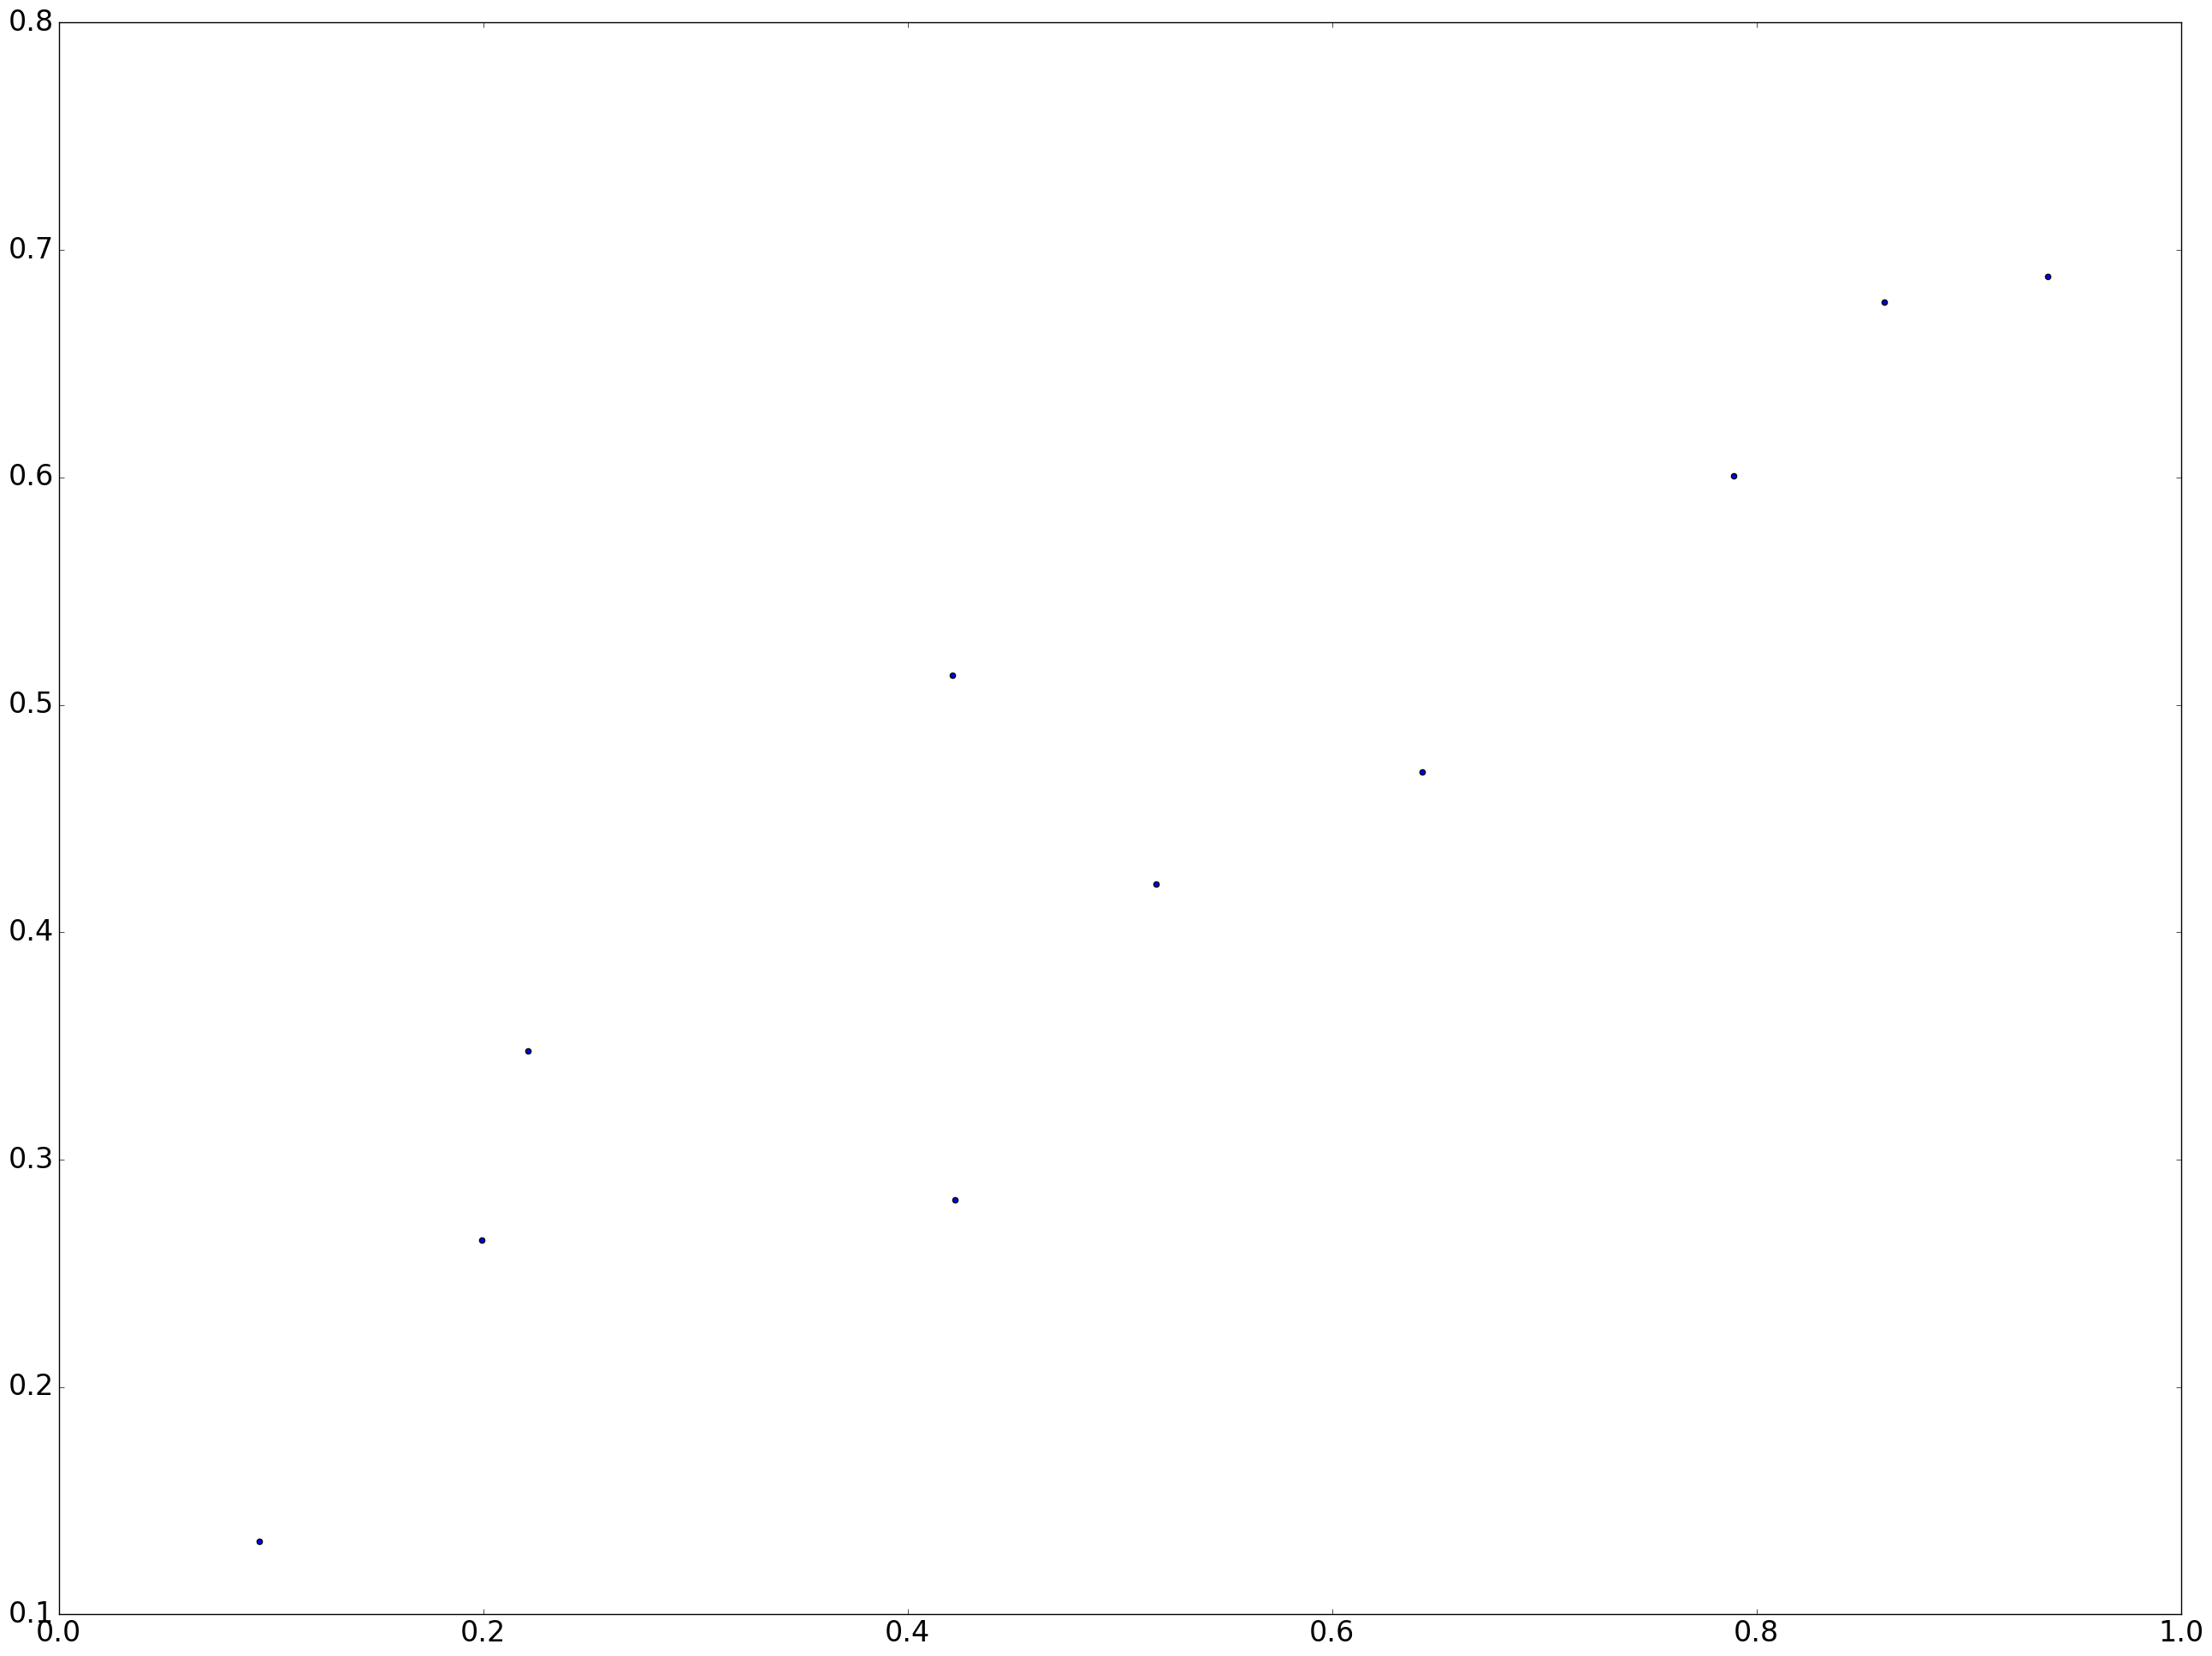

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)

## 2. Create a general function ##
Change the above code to a function that receives the parameters $m$, $c$ and $n$ for the equation $y_i = c + m x_i + e_i$ and returns $n$ samples as shown in the previous exercise.  
Use the code to generate a 100 samples from the equation above and scatter plot the new sample.

In [27]:
def genFunc(m, c, n):    
    x = np.random.rand(n)
    e = 0.1 * np.random.randn(n)
    y = np.array(c + m*x + e)
    return y,x

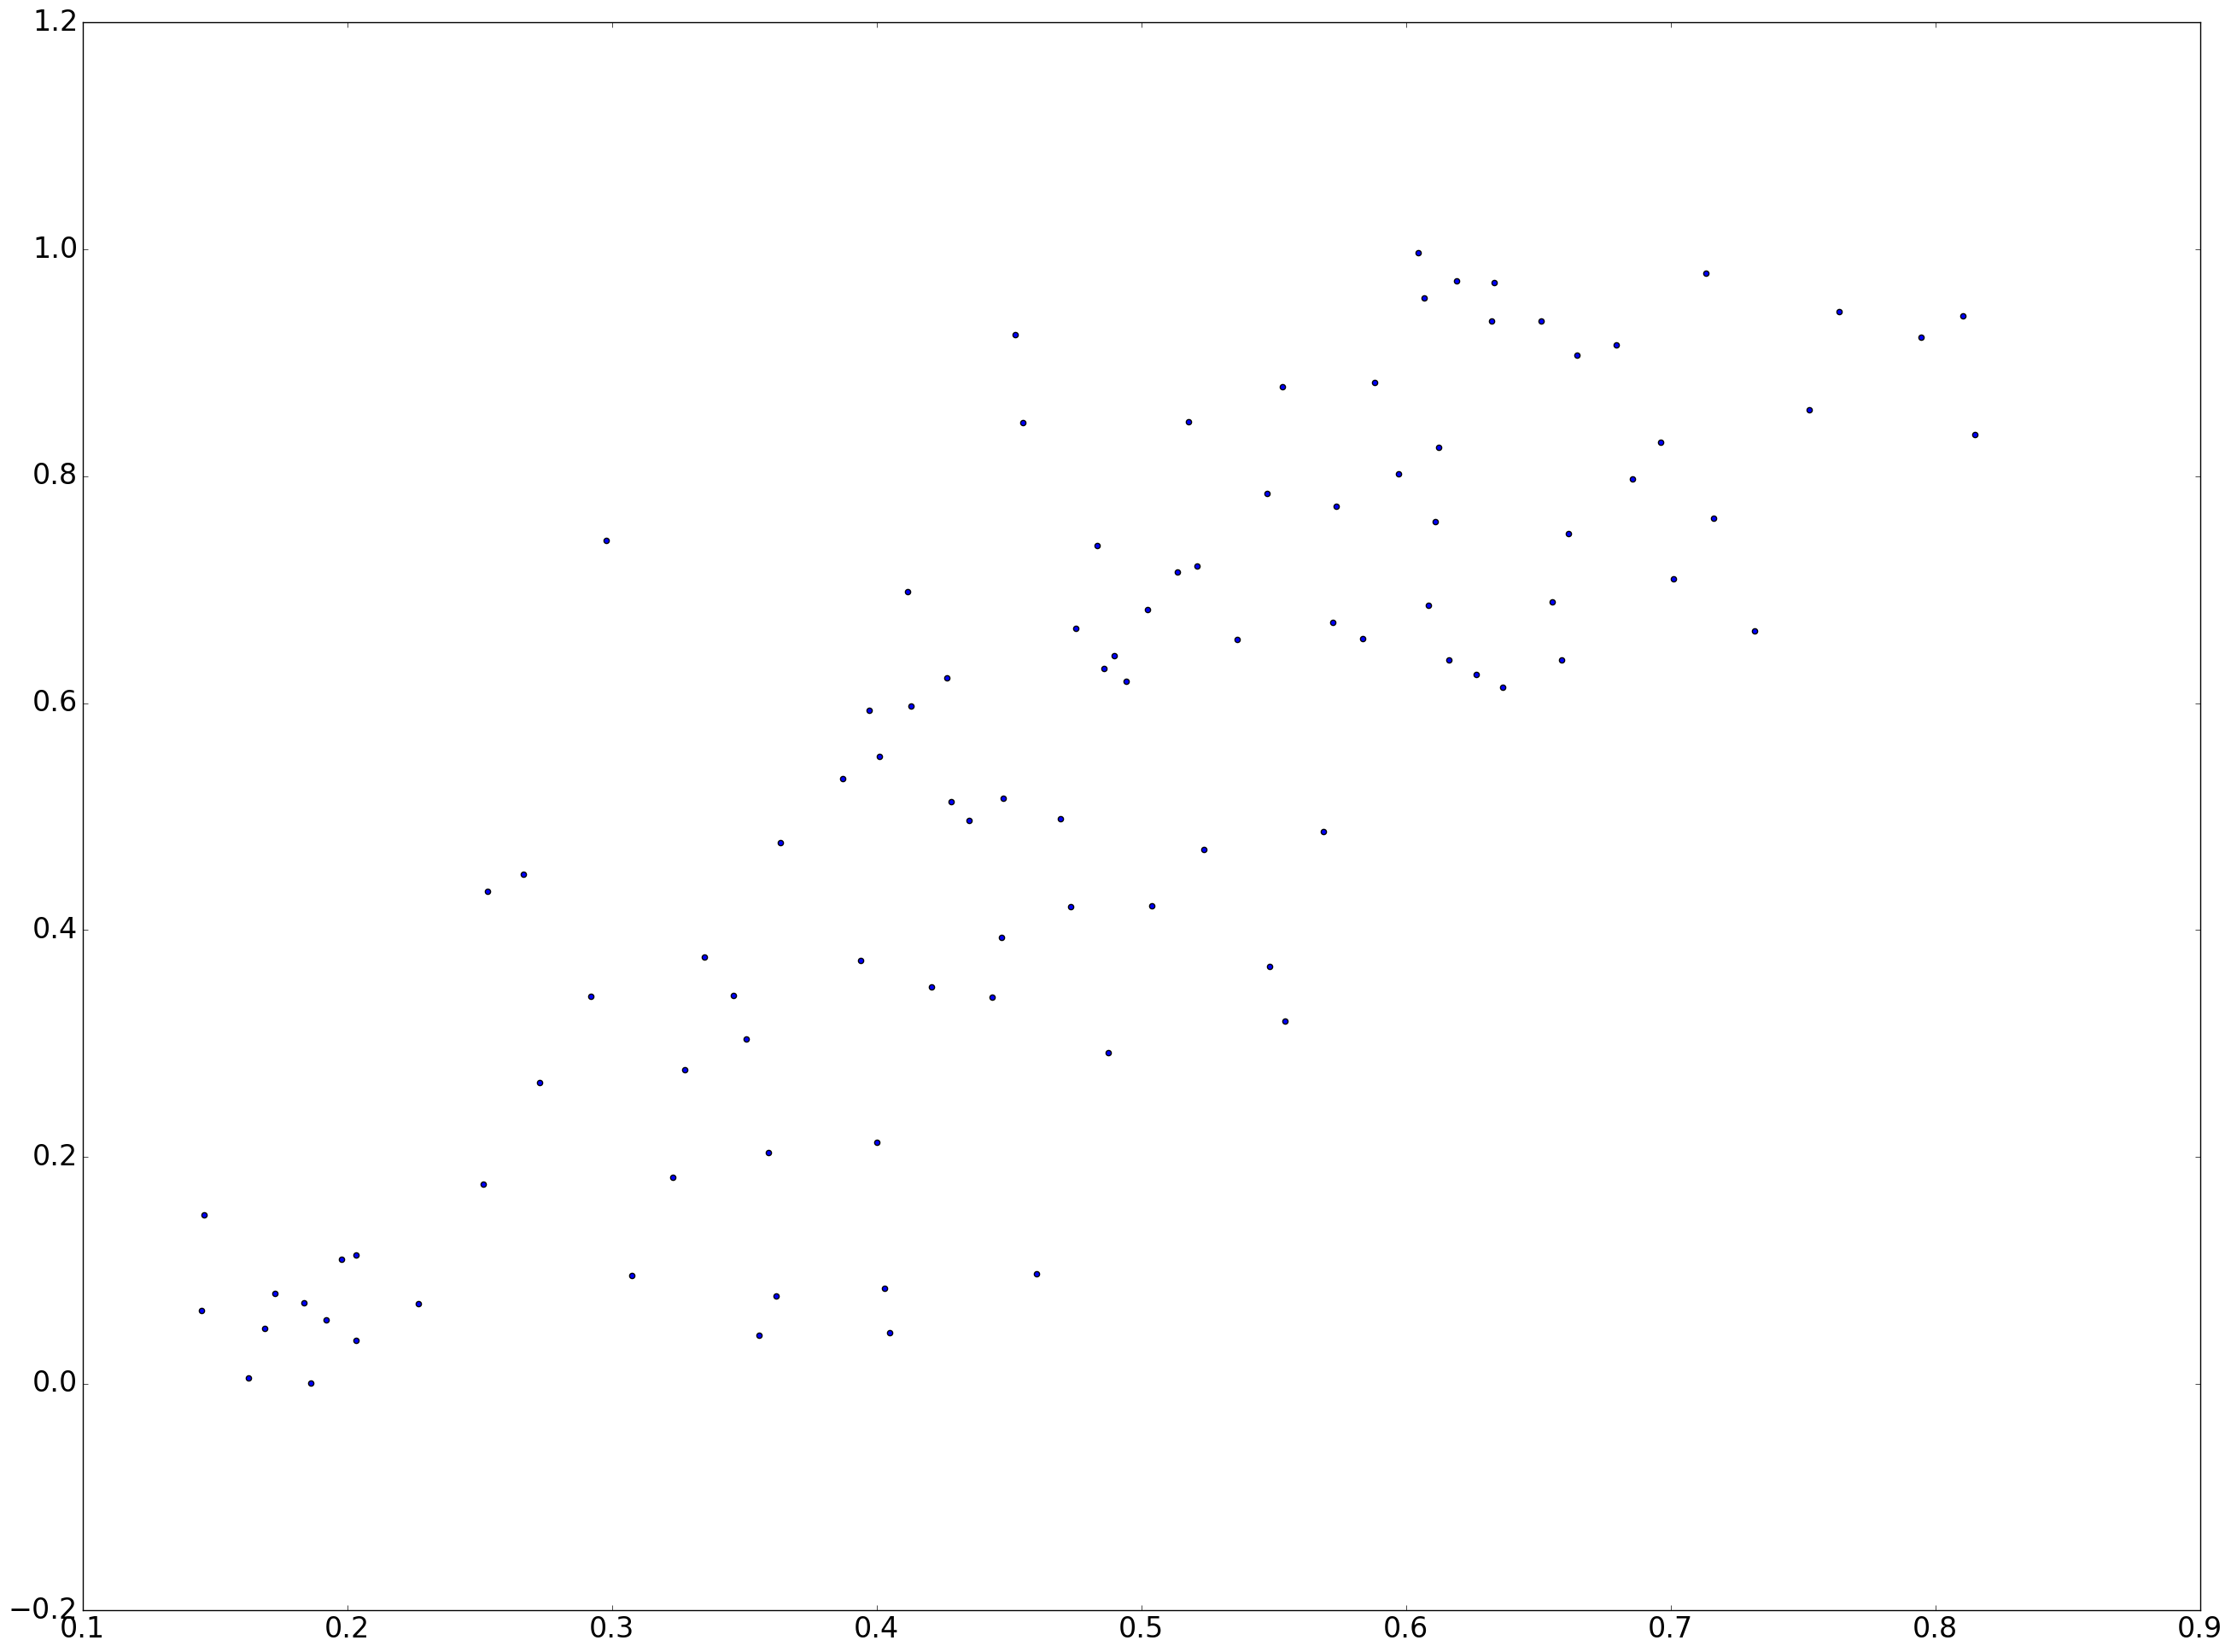

In [28]:
a,b = genFunc(0.5, 0.2, 100)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(a,b)


## 3. Least squares - Matrix Form ##
Using the sequences ${y_i}$ and ${x_i}$ from **Q2**, implement the matrix form of the method of least squares to determine estimates of the parameters $a$ and $b$ assuming that $y_i=a+bx_i+e_i$.

In [29]:
## als = (XtX)^-1 XtY
def getAls (x,y,d):
    Y = np.array(y).reshape(x.size, 1)
    X = np.arange(float(x.size*d)).reshape(x.size, d)
    X[:,0] = 1
    for i in range(0, x.size):
        for j in range(1, d):
            X[i][j] = x[i]**j
    
    X = np.matrix(X)    
    Xt = X.transpose()
    als = np.linalg.inv(Xt*X)*Xt*Y
    return als

In [30]:
n = 100
x,y = genFunc(0.5, 0.2, n)

als = getAls(x,y,2)
a = als.item(0)
b = als.item(1)
print(a,b)

-0.13861550530796887 1.3273507980673345


### Discuss: ### 
<font color="blue">what is the effect of changing the mean and the standard deviation of ei on the
estimated values of m and c
</font>

## 4. Line fitting ##

Draw the line defined by the estimated values of $a$ and $b$ on top of the scatter plot generated in **Q2**. Note: do not use any pre-defined functions. Write your own code to plot the line.

-1.1647302883048674 0.8073818087080759


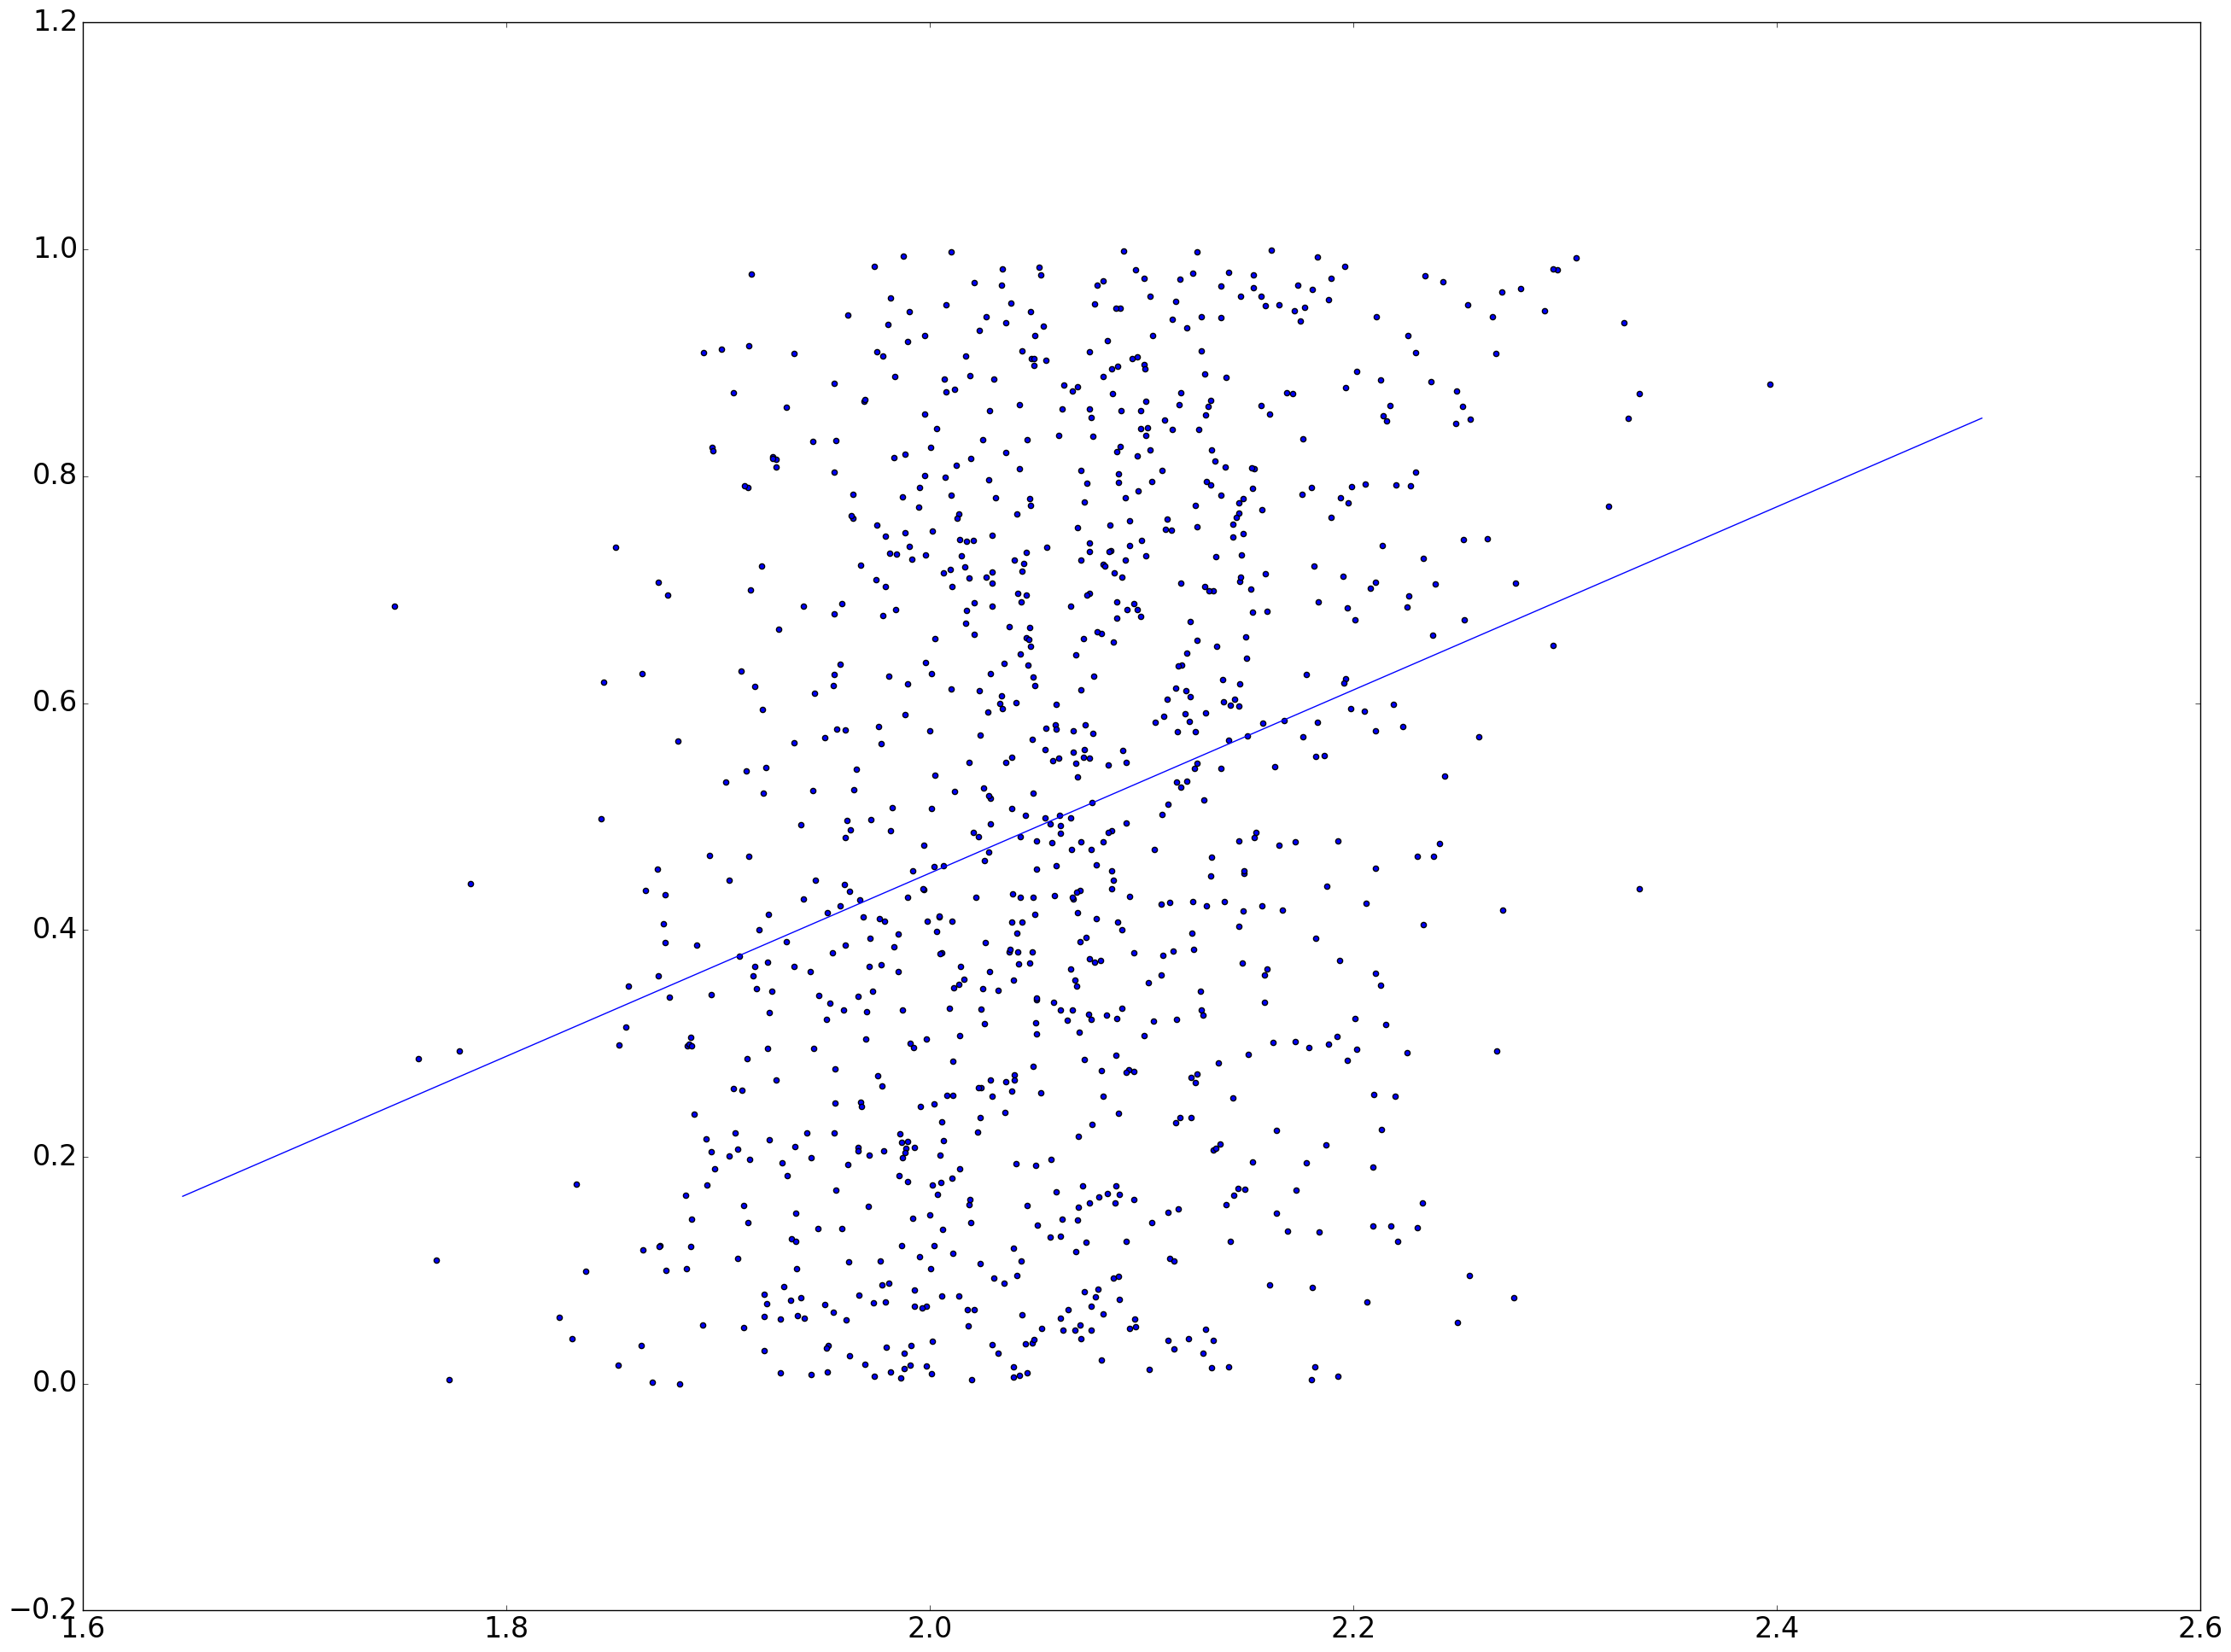

In [53]:
x,y = genFunc(0.1, 2, 1000)

als = getAls(x,y,2)
a = als.item(0)
b = als.item(1)
print(a,b)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)

xp = np.array([np.amin(x)-0.1, np.amax(x)+0.1])
yp = np.array(b*xp + a).reshape(2)
pl = plt.plot(xp,yp)



## 5. Outliers ##
Add a few outliers to your data. For example, add the points {(0.5, 5), (0.6, 5), (0.7, 5)} to the sampled sequences from Q2.

Re-estimate the best line that fits the data after the addition of the outliers.

Plot the best fit line before and after the outlier data, in a way similar to the figure below (including the colouring and the legend).

![Line fit](lineFit.jpg)

### Discuss ###

<font color="blue">what is the effect of outliers on the best line estimate?</font>

## 6. Choosing your Model ##

### 6.1. Loading your data ###

Load the data in the file DMD.csv where the first column is $x_i$ and the second column is $y_i$.

Generate a scatter plot of $(x_i, y_i)$.

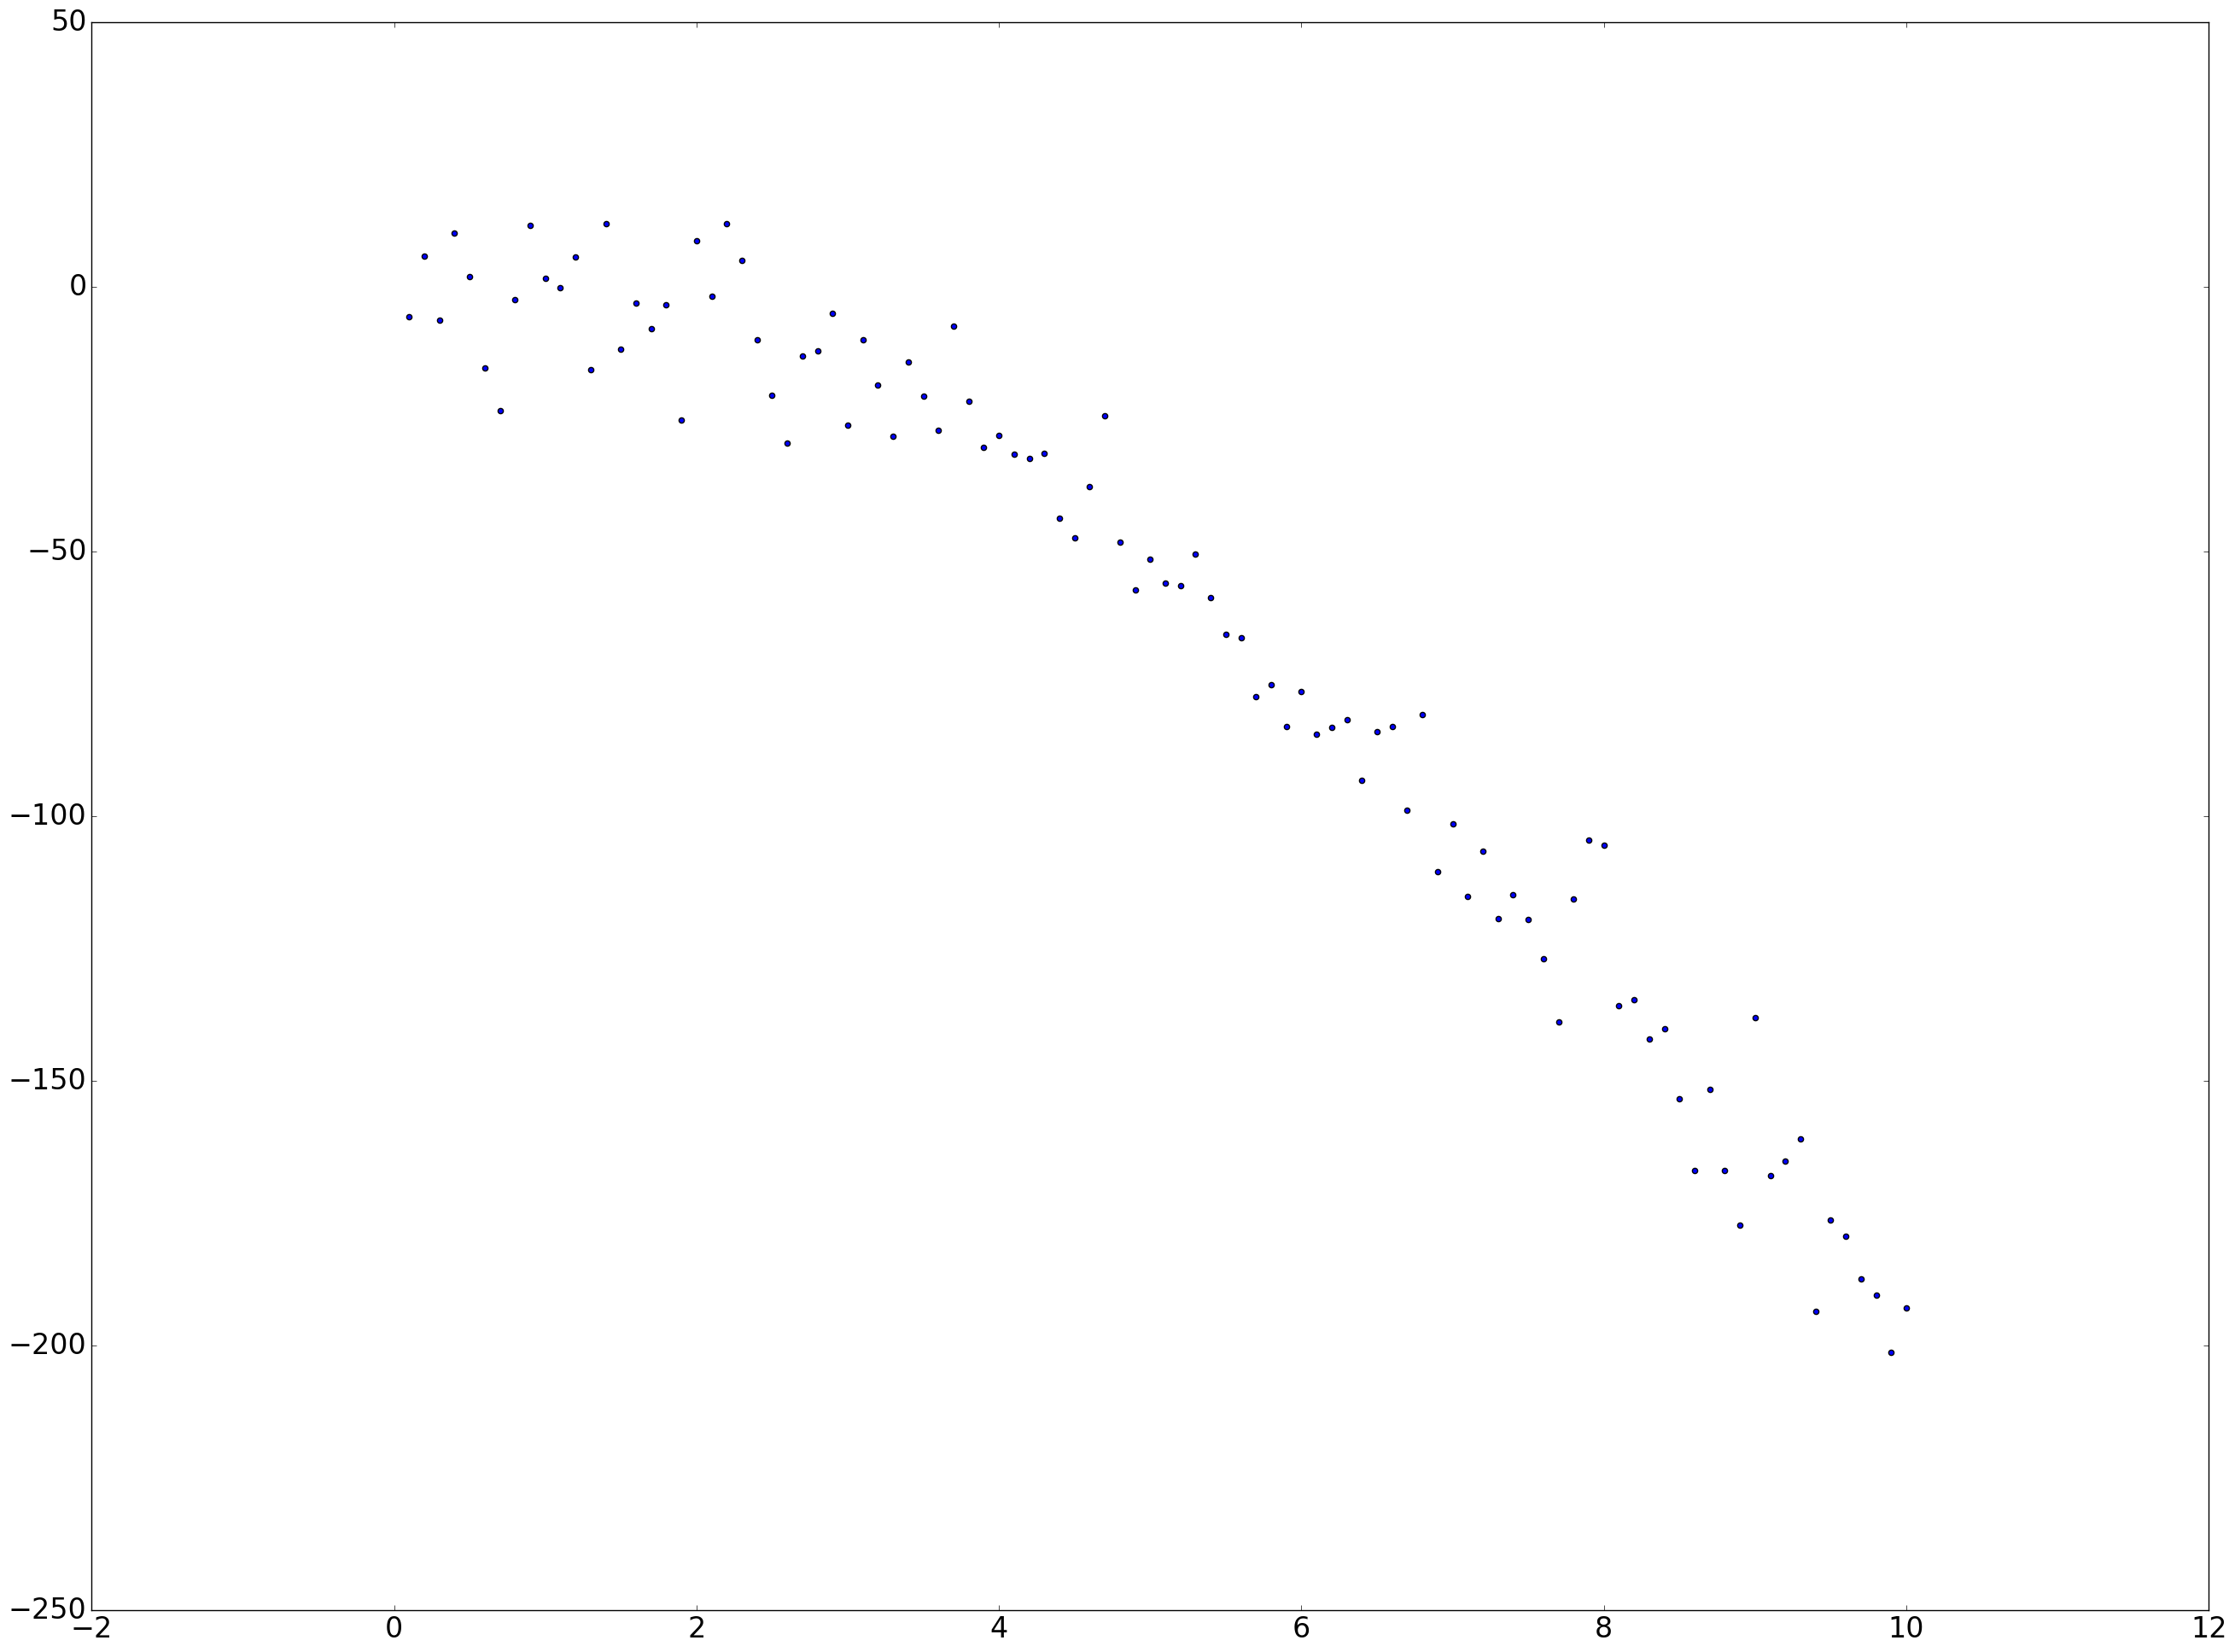

In [39]:
csv = np.genfromtxt('DMD.csv', delimiter=',')
fig = plt.figure()
ax = fig.add_subplot(111)
x = csv[:,0]
y = csv[:,1]
ax.scatter(x,y)

### 6.2. Deciding on the Model's Complexity ###

Assuming a polynomial relationship between $x_i$ and $y_i$, what would you suggest as a suitable complexity for the model? Write your modelâ€™s equation.

In [40]:
## 2 degree polynomial. 
## y = a + bx + cx^2

### Discuss ###

<font color="blue">for the model youâ€™ve chosen, what are the parameters of the model?</font>

### 6.2. Calculating the Model's Parameters ###

Adjust the code in Q3 if needed to calculate the parameters of your chosen model for this data.

### Discuss ###
<font color="blue">what would X and y in the least squares solution be?</font>

Plot your best fitting polynomail from Q8.

2.5941063571185192 -1.0060172234439584 -1.9434855728898148


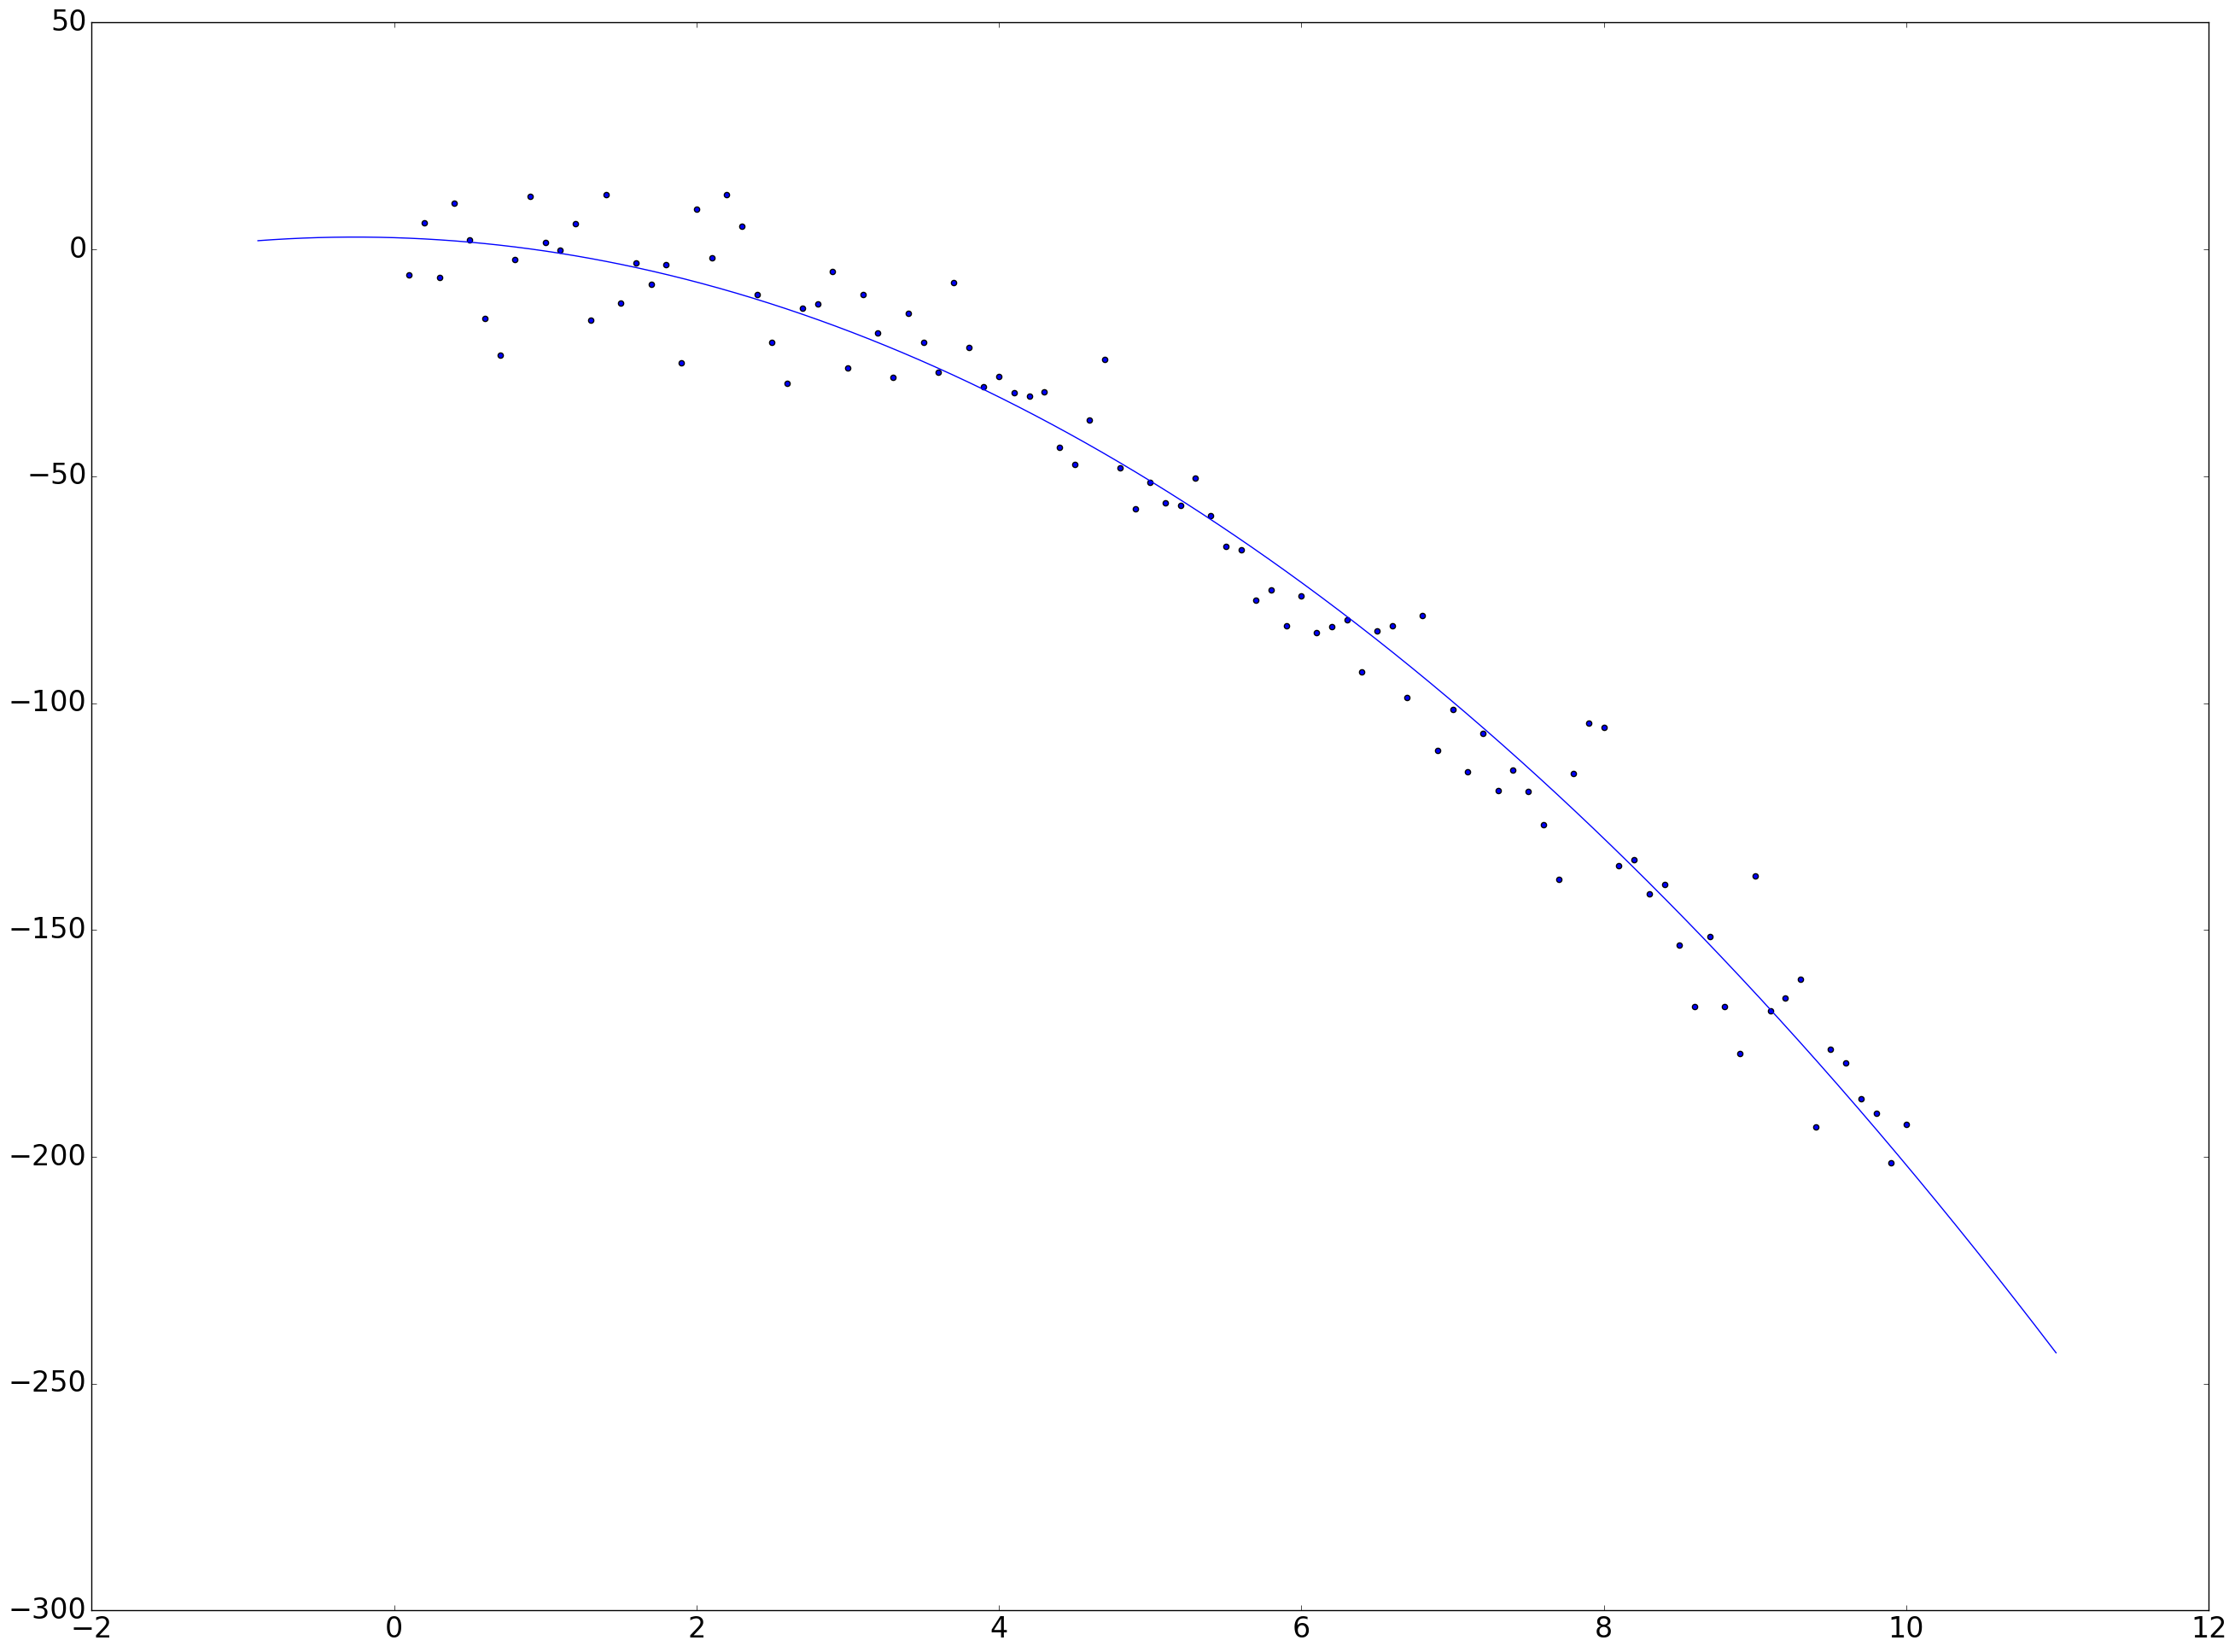

In [42]:
## als = (XtX)^-1 XtY 
csv = np.genfromtxt('DMD.csv', delimiter=',')
x = csv[:,0]
y = csv[:,1]

als = getAls(x,y,3)

a1 = als.item(0)
a2 = als.item(1)
a3 = als.item(2)
print(a1,a2,a3)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)

xp = np.arange(np.amin(x)-1, np.amax(x)+1, 0.01)
yp = np.array((a1 + a2*xp + a3*xp**2))
pl = plt.plot(xp,yp)

### 6.3. Generalisation and Overfitting ###

What would the model be if you generalise it further?

What would the model be if you attempt to overfit the training data?

### Discuss ###

<font color="blue">write down your answers for Q10 and Q11 and discuss your written explanation
with a TA</font>

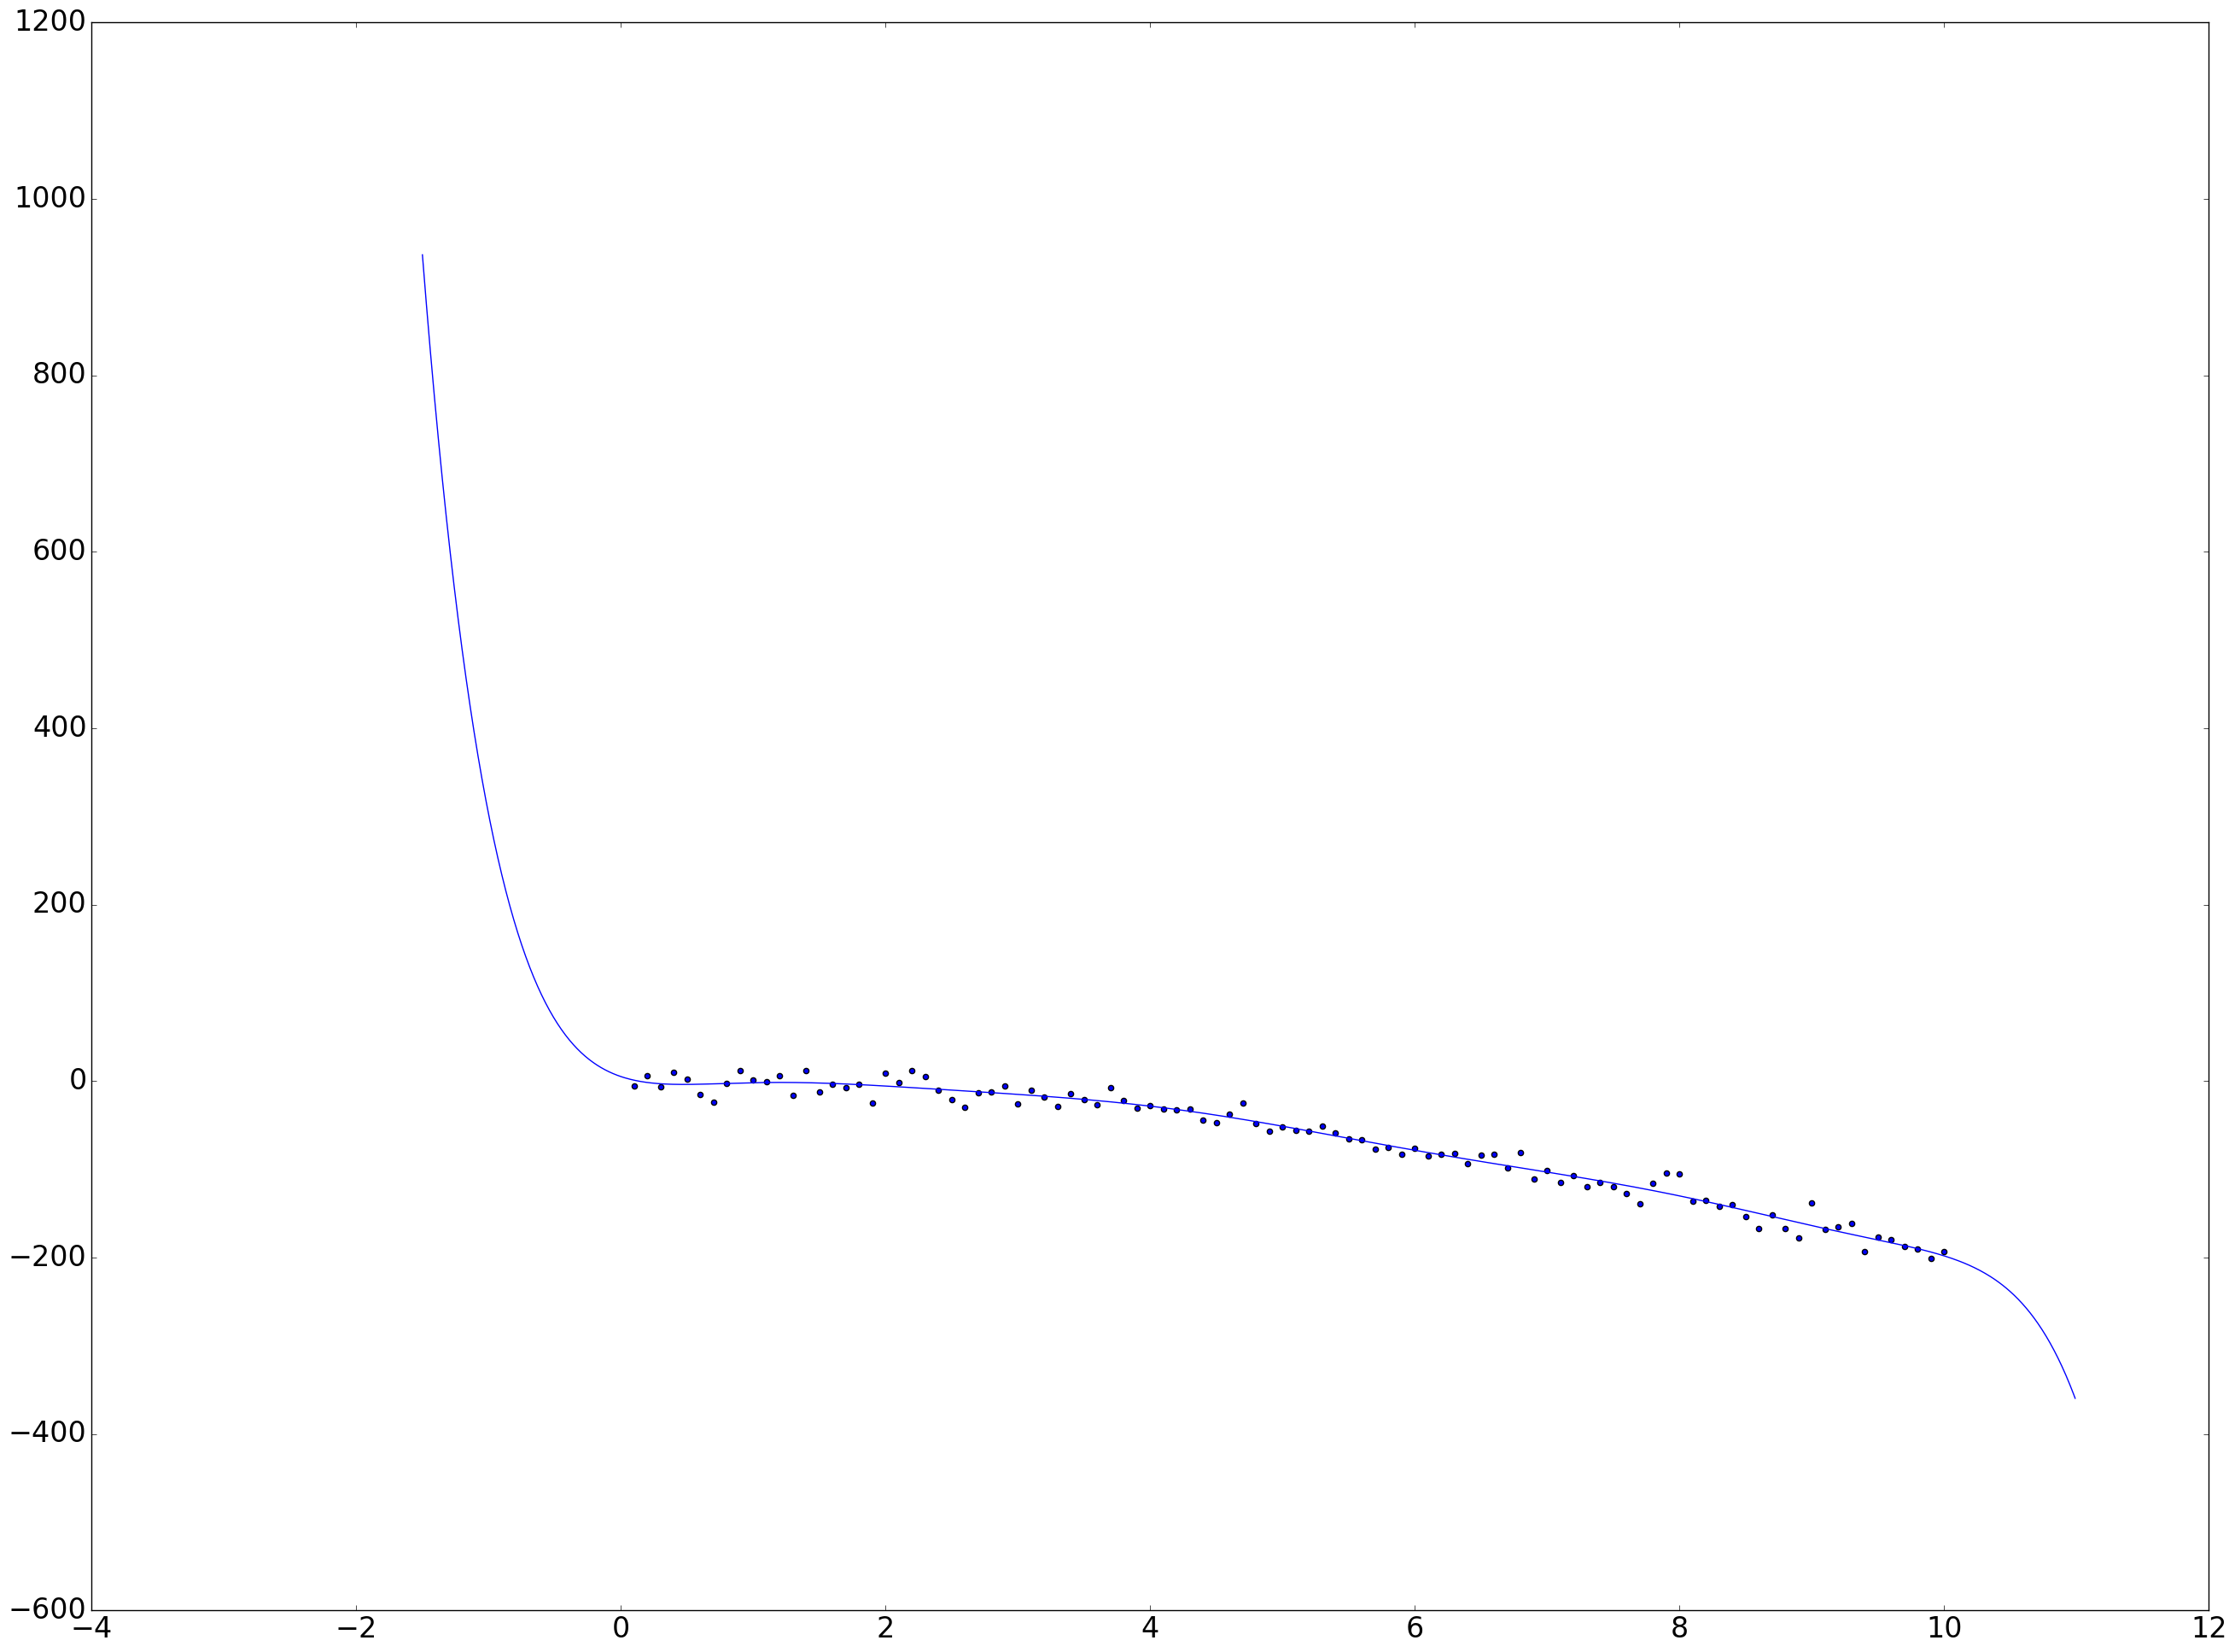

In [46]:
## als = (XtX)^-1 XtY 
csv = np.genfromtxt('DMD.csv', delimiter=',')
x = csv[:,0]
y = csv[:,1]

als = getAls(x,y,10)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)

xp = np.arange(-1.5, 11, 0.01)
yp = np.array(als.item(0) + als.item(1)*xp + als.item(2)*xp**2
             + als.item(3)*xp**3 + als.item(4)*xp**4
             + als.item(5)*xp**5 + als.item(6)*xp**6
             + als.item(7)*xp**7 + als.item(8)*xp**8
             + als.item(9)*xp**9)
pl = plt.plot(xp,yp)